In this notebook, we want to explore the use of Auto ML and hopefully combining Auto ML with GPUs. As a baseline, we want to reimplement the Oral Prep model using Auto ML and compare results.

Of particular importance is to check for the following:
* **How early stopping is carried out - since models can run for a long time:**
    Various early stopping parameters [are enabled](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/early_stopping.html) by default and they seem sufficient. For best results, it's recommended to provide the validation dataframe for additional early stopping.
* **Whether feature selection is automatically performed:** Feature selection or engineering is not supported. An alternative product called [H2O Driverless AI](https://www.h2o.ai/products/h2o-driverless-ai/automatic-feature-engineering/) is provided for this task.
* **Whether features can be limited to a certain user-specified number:** Feature engineering is not supported.
* **How issues like overfitting and class imbalance are handled:** Only over/under sampling is [supported.](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html)
* **Algorithms supported** - AutoML supports a [less number of models](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science.html#supervised) than say caret since some models such as decision tree, conditional inference trees, knn, logistic regression, etc. are missing.
* Perform the same with AutoKeras

In [1]:
#as.vector(installed.packages()[,"Package"])

[1] "arules"            "arulesViz"         "askpass"          
  [4] "assertthat"        "attempt"           "backports"        
  [7] "base64enc"         "BBmisc"            "benchmarkme"      
 [10] "benchmarkmeData"   "bestglm"           "BH"               
 [13] "bigassertr"        "bigreadr"          "bit"              
 [16] "bit64"             "bitops"            "blob"             
 [19] "brew"              "brio"              "broom"            
 [22] "cachem"            "callr"             "caret"            
 [25] "caTools"           "cellranger"        "checkmate"        
 [28] "cli"               "clipr"             "coin"             
 [31] "colorspace"        "commonmark"        "covr"             
 [34] "cpp11"             "crayon"            "credentials"      
 [37] "crosstalk"         "curl"              "data.table"       
 [40] "DBI"               "dbplyr"            "dendextend"       
 [43] "desc"              "DescTools"         "devtools"         
 [46] "diffobj"           "digest"            "disk.frame"       
 [49] "doParallel"        "dplyr"             "DT"               
 [52] "dtplyr"            "e1071"             "ellipsis"         
 [55] "evaluate"          "Exact"             "expm"             
 [58] "fansi"             "farver"            "fastDummies"      
 [61] "fastmap"           "fastmatch"         "filelock"         
 [64] "forcats"           "foreach"           "fs"               
 [67] "fst"               "furrr"             "future"           
 [70] "future.apply"      "fuzzyjoin"         "gclus"            
 [73] "gdalUtils"         "generics"          "geosphere"        
 [76] "gert"              "getPass"           "ggplot2"          
 [79] "ggthemes"          "gh"                "gitcreds"         
 [82] "gld"               "glmnet"            "globals"          
 [85] "glue"              "gower"             "gplots"           
 [88] "gridExtra"         "grpreg"            "gtable"           
 [91] "gtools"            "h2o"               "haven"            
 [94] "highcharter"       "highr"             "hms"              
 [97] "htmltools"         "htmlwidgets"       "httpuv"           
[100] "httr"              "hunspell"          "igraph"           
[103] "ini"               "ipred"             "IRdisplay"        
[106] "IRkernel"          "isoband"           "iterators"        
[109] "janeaustenr"       "janitor"           "jsonlite"         
[112] "kernlab"           "keyring"           "knitr"            
[115] "labeling"          "later"             "lava"             
[118] "lazyeval"          "leaflet"           "leaflet.providers"
[121] "leaps"             "learnr"            "libcoin"          
[124] "lifecycle"         "listenv"           "lmom"             
[127] "lmtest"            "locfit"            "lubridate"        
[130] "magrittr"          "markdown"          "matrixStats"      
[133] "memoise"           "mime"              "mlr"              
[136] "ModelMetrics"      "modelr"            "modeltools"       
[139] "multcomp"          "munsell"           "mvtnorm"          
[142] "NCmisc"            "numDeriv"          "odbc"             
[145] "openssl"           "packrat"           "pacman"           
[148] "parallelly"        "parallelMap"       "ParamHelpers"     
[151] "party"             "pbdZMQ"            "pillar"           
[154] "pkgbuild"          "pkgconfig"         "pkgload"          
[157] "plogr"             "plotly"            "pls"              
[160] "plumber"           "plyr"              "png"              
[163] "praise"            "prettyunits"       "pROC"             
[166] "processx"          "prodlim"           "proftools"        
[169] "progress"          "promises"          "pryr"             
[172] "ps"                "purrr"             "qap"              
[175] "quadprog"          "quantmod"          "R.methodsS3"      
[178] "R.oo"              "R.utils"           "R6"               
[181] "randomForest"      "rappdirs"      

In [2]:
#which(grepl(pattern = "^h2o*", x = as.vector(installed.packages()[,"Package"]), ignore.case = TRUE))

[1] 92

In [3]:
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 4.0.3"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.5     v dplyr   1.0.3
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0

Warning message:
"package 'ggplot2' was built under R version 4.0.3"
Warning message:
"package 'tibble' was built under R version 4.0.3"
Warning message:
"package 'tidyr' was built under R version 4.0.3"
Warning message:
"package 'readr' was built under R version 4.0.3"
Warning message:
"package 'purrr' was built under R version 4.0.3"
Warning message:
"package 'dplyr' was built under R version 4.0.3"
Warning message:
"package 'stringr' was built under R version 4.0.3"
Warning message:
"package 'forcats' was built under R version 4.0.3"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() -

# Data importation

In [4]:
data = read_rds(file = "./df2_all_ft.rds")

In [5]:
head(data)

,e1demoend1q18_Yes,e1demoend1q22_Yes,e1demoend1q23_Yes,e1end11e2hseq28_Yes,e1end11e2hseq33_No,e1end11e2sxq101_Yes,e1end11e2rand4_q130_A.50..chance.to.gain.KSH.1.250.and.a.50..chance.to.gain.nothing,e1end11e2rand4_q131_A.sure.loss.of.KSH.5.000,Population_AGYWs,Population_Female.Sex...Workers..FSWs.,...,e1end11e2Disc_q153_Every.month,e1end11e2Disc_q153_Every.3.months,e1end11e2Disc_q153_Every.2.weeks,e1end11e2Disc_q156_Regular.Hours..Saturdays.,e1end11e2Disc_q156_Regular.Hours..Morning.only..Monday.to.Friday.,e1end11e2Disc_q156_Regular.Hours..Afternoon.,e1end11e2Disc_q158_1hr,e1end11e2Disc_q158_Less.than.1.hr,e1end11e2Disc_q158_2hrs.and.above,Continuation_rates
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,Low_Continuation
2,1,0,1,1,0,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,Low_Continuation
3,0,0,1,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,High_Continuation
4,1,0,0,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,Low_Continuation
5,1,0,0,1,0,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,Low_Continuation
6,0,0,0,1,0,1,0,0,0,1,...,1,0,0,1,0,0,1,0,0,High_Continuation


# Initialise and test h2o

Warning message:
"package 'h2o' was built under R version 4.0.4"

----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit https://docs.h2o.ai

----------------------------------------------------------------------



Attaching package: 'h2o'


The following objects are masked from 'package:stats':

    cor, sd, var


The following objects are masked from 'package:base':

    %*%, %in%, &&, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc





H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    C:\Users\User\AppData\Local\Temp\RtmpmW0vCs\file1a144fc9f43/h2o_User_started_from_r.out
    C:\Users\User\AppData\Local\Temp\RtmpmW0vCs\file1a14648854d6/h2o_User_started_from_r.err


Starting H2O JVM and connecting: . Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         11 seconds 127 milliseconds 
    H2O cluster timezone:       Africa/Nairobi 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.32.0.1 
    H2O cluster version age:    5 months and 3 days !!! 
    H2O cluster name:           H2O_started_from_R_User_scc974 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   1.75 GB 
    H2O cluster total cores:    4 
    H2O cluster allowed cores:  4 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    

Warning message in h2o.clusterInfo():
"
Your H2O cluster version is too old (5 months and 3 days)!
Please download and install the latest version from http://h2o.ai/download/"





	demo(h2o.kmeans)
	---- ~~~~~~~~~~

> # This is a demo of H2O's K-Means function
> # It imports a data set, parses it, and prints a summary
> # Then, it runs K-Means with k = 5 centers on a subset of characteristics
> # Note: This demo runs H2O on localhost:54321
> library(h2o)

> h2o.init()
 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         11 seconds 639 milliseconds 
    H2O cluster timezone:       Africa/Nairobi 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.32.0.1 
    H2O cluster version age:    5 months and 3 days !!! 
    H2O cluster name:           H2O_started_from_R_User_scc974 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   1.75 GB 
    H2O cluster total cores:    4 
    H2O cluster allowed cores:  4 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      

Warning message in h2o.clusterInfo():
"
Your H2O cluster version is too old (5 months and 3 days)!
Please download and install the latest version from http://h2o.ai/download/"




> prostate.hex = h2o.uploadFile(path = system.file("extdata", "prostate.csv", package="h2o"), destination_frame = "prostate")
  |======================================================================| 100%

> summary(prostate.hex)


Warning message in summary.H2OFrame(prostate.hex):
"Approximated quantiles computed! If you are interested in exact quantiles, please pass the `exact_quantiles=TRUE` parameter."


 ID               CAPSULE          AGE             RACE           
 Min.   :  1.00   Min.   :0.0000   Min.   :43.00   Min.   :0.000  
 1st Qu.: 95.75   1st Qu.:0.0000   1st Qu.:62.00   1st Qu.:1.000  
 Median :190.50   Median :0.0000   Median :67.00   Median :1.000  
 Mean   :190.50   Mean   :0.4026   Mean   :66.04   Mean   :1.087  
 3rd Qu.:285.25   3rd Qu.:1.0000   3rd Qu.:71.00   3rd Qu.:1.000  
 Max.   :380.00   Max.   :1.0000   Max.   :79.00   Max.   :2.000  
 DPROS           DCAPS           PSA               VOL            
 Min.   :1.000   Min.   :1.000   Min.   :  0.300   Min.   : 0.00  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:  4.900   1st Qu.: 0.00  
 Median :2.000   Median :1.000   Median :  8.664   Median :14.20  
 Mean   :2.271   Mean   :1.108   Mean   : 15.409   Mean   :15.81  
 3rd Qu.:3.000   3rd Qu.:1.000   3rd Qu.: 17.063   3rd Qu.:26.40  
 Max.   :4.000   Max.   :2.000   Max.   :139.700   Max.   :97.60  
 GLEASON        
 Min.   :0.000  
 1st Qu.:6.000  
 Median :6.

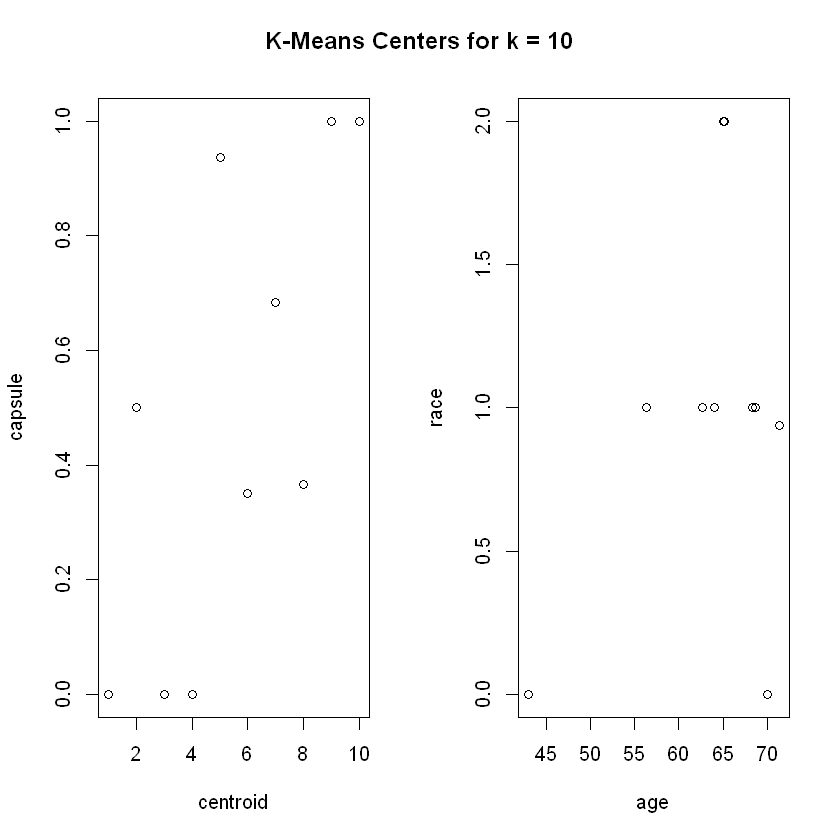

In [6]:
library(h2o)
localH2O = h2o.init()
demo(h2o.kmeans)

# Model training

Model training with default settings that include: early stopping and random search hyper-parameter tuning. 

Notes:
1. Stratified split is not available - but can be passed as a parameter depending on the type of algorithm used.
2. Grid Search hyper-parameter tuning is done on specific algorithms - according to this [link.](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html#random-grid-search-parameters)
3. When `max_models` is set, what criteria is used to select the models? [This link](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html#faq) under FAQs describes the order in which the models are trained when `h2o.automl` is used. If 4 is chosen, the first 4 in that order are selected.

Ref:
* http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/fold_assignment.html
* http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/fold_assignment.html?highlight=stratified#example
* https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html#faq
* https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html#random-grid-search-parameters

In [7]:
data %>% 
count(Continuation_rates) %>% 
mutate(prop = n/sum(n))

,Continuation_rates,n,prop
,<fct>,<int>,<dbl>
1,High_Continuation,189,0.3165829
2,Low_Continuation,408,0.6834171


In [8]:
set.seed(123)
train_idx <- caret::createDataPartition(y = data$Continuation_rates, p = 0.8, list = FALSE)

In [9]:
train_data <- data[train_idx,]
test_data <- data[-train_idx,]

In [10]:
train_x <- train_data %>% select(-Continuation_rates)
train_y <- train_data %>% select(Continuation_rates)

In [11]:
test_x <- test_data %>% select(-Continuation_rates)
test_y <- test_data %>% select(Continuation_rates)

In [12]:
outcome <- "Continuation_rates"

predictors <- setdiff(colnames(data),outcome)

In [13]:
#Convert to h2oFrame object
train_data <- as.h2o(train_data)
test_data <- as.h2o(test_data)

  |======================================================================| 100%
  |======================================================================| 100%


In [14]:
doParallel::registerDoParallel(parallel::detectCores())

In [15]:
system.time(
h2o_model <- h2o.automl(x = predictors, 
                        y = outcome,
                        training_frame = train_data,
                        validation_frame = test_data, 
                        nfolds = 10, 
                        balance_classes = TRUE, 
                        max_models = 20, 
                        seed = 123, 
                        max_runtime_secs = 60*30)
)

  |                                                                      |   0%
17:26:28.0: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
  |======================================================================| 100%


   user  system elapsed 
  13.39    0.43 1006.63 

In [16]:
doParallel::stopImplicitCluster()

# Training & validation results

In [17]:
training_results <- as_tibble(h2o_model@leaderboard) %>% mutate(sn = row_number()) %>% 
relocate(sn, `.before` = everything())

In [18]:
bind_rows(
training_results %>% head(1),

training_results %>% 
filter(str_detect(string = model_id, pattern = "Ens")))

sn,model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,DeepLearning_grid__2_AutoML_20210312_172628_model_2,0.5941675,0.7958788,0.7787074,0.4916606,0.5182256,0.2685578
7,StackedEnsemble_BestOfFamily_AutoML_20210312_172628,0.5776094,0.6151870,0.7704721,0.5000000,0.4618589,0.2133136
12,StackedEnsemble_AllModels_AutoML_20210312_172628,0.5657895,0.6179493,0.7493928,0.4931897,0.4630051,0.2143738


In [19]:
h2o_model@leader

Model Details:

H2OBinomialModel: deeplearning
Model ID:  DeepLearning_grid__2_AutoML_20210312_172628_model_2 
Status of Neuron Layers: predicting Continuation_rates, 2-class classification, bernoulli distribution, CrossEntropy loss, 8,502 weights/biases, 135.0 KB, 584,730 training samples, mini-batch size 1
  layer units             type dropout       l1       l2 mean_rate rate_rms
1     1   116            Input  0.00 %       NA       NA        NA       NA
2     2    50 RectifierDropout 50.00 % 0.000000 0.000000  0.008616 0.017030
3     3    50 RectifierDropout 50.00 % 0.000000 0.000000  0.003415 0.015747
4     4     2          Softmax      NA 0.000000 0.000000  0.005707 0.006859
  momentum mean_weight weight_rms mean_bias bias_rms
1       NA          NA         NA        NA       NA
2 0.000000    0.188701   0.240668 -0.012753 0.162716
3 0.000000   -0.025942   0.165097  0.593419 0.303803
4 0.000000    0.108099   0.934685  0.017226 0.204526


H2OBinomialMetrics: deeplearning
** Reporte

The top performing model has an AUC of 67% compared with a baseline of 70%. This is captured under *Metrics reported on full validation frame (118 obs.)*. Given that these results are very close to our baseline, and considering the little effort that has gone into developing the model as well as its ensembles, this looks like a desirable way of automating the development of models even with the limitation in variety of models available. Even after adjusting the threshold to optimal values, this model is still at par with the Oral Prep one. Both models are using the same 10 features.

# Optimise thresholds of the model (i.e. operating point)

In [20]:
#ROC OPERATING POINT
class(h2o_model@leader)

[1] "H2OBinomialModel"
attr(,"package")
[1] "h2o"

In [21]:
perf <- h2o.performance(model = h2o_model@leader, newdata = test_data, valid = TRUE)

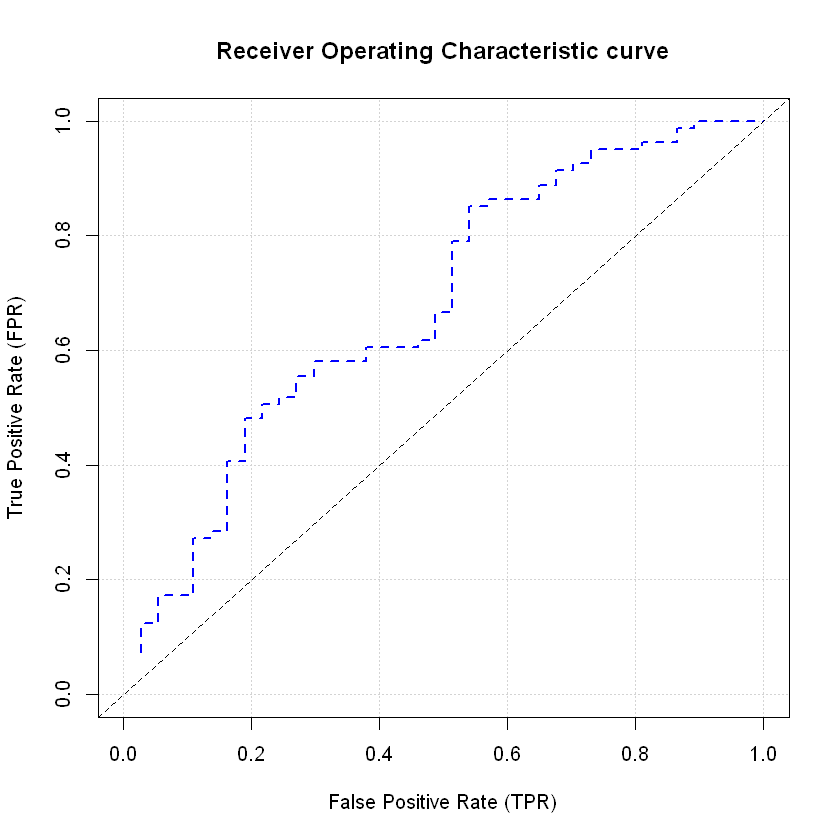

In [22]:
plot(perf, type="roc")

In [23]:
perf

H2OBinomialMetrics: deeplearning

MSE:  0.3365567
RMSE:  0.5801351
LogLoss:  2.428955
Mean Per-Class Error:  0.3895562
AUC:  0.678345
AUCPR:  0.7992543
Gini:  0.35669

Confusion Matrix (vertical: actual; across: predicted) for F1-optimal threshold:
                  High_Continuation Low_Continuation    Error     Rate
High_Continuation                10               27 0.729730   =27/37
Low_Continuation                  4               77 0.049383    =4/81
Totals                           14              104 0.262712  =31/118

Maximum Metrics: Maximum metrics at their respective thresholds
                        metric threshold     value idx
1                       max f1  0.003042  0.832432  97
2                       max f2  0.000062  0.924658 107
3                 max f0point5  0.032620  0.789474  82
4                 max accuracy  0.003042  0.737288  97
5                max precision  1.000000  0.909091   4
6                   max recall  0.000062  1.000000 107
7              ma

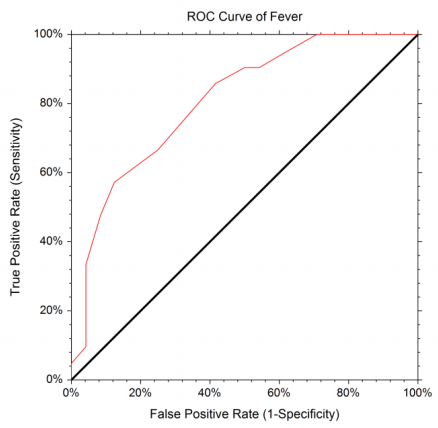

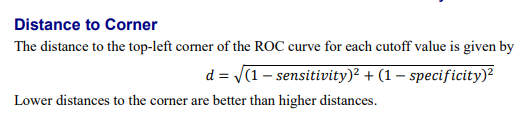

tpr = sensitivity <br/>
fpr = 1-specificity

In [24]:
metrics <- as_tibble(bind_cols(h2o.tpr(object = perf),h2o.fpr(object = perf)))

New names:
* threshold -> threshold...1
* threshold -> threshold...3



In [39]:
distances <- metrics %>% 
select(threshold...1,tpr,fpr) %>% 
rename(threshold = threshold...1,
       sensitivity = tpr) %>%  
mutate(specificity = 1-fpr) %>% 
mutate(d = sqrt(((1-sensitivity)^2)+((1-specificity)^2))) %>% 
arrange(d)

head(distances)

threshold,sensitivity,fpr,specificity,d
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9334246,0.5802469,0.2972973,0.7027027,0.5143718
0.9625225,0.5555556,0.2702703,0.7297297,0.5201701
0.9500833,0.5679012,0.2972973,0.7027027,0.5244950
0.9248589,0.5802469,0.3243243,0.6756757,0.5304516
0.9639995,0.5432099,0.2702703,0.7297297,0.5307572
0.9514745,0.5555556,0.2972973,0.7027027,0.5347116


In [66]:
v <- distances$fpr[1]
h <- distances$sensitivity[1]
thr <- distances$threshold[1]

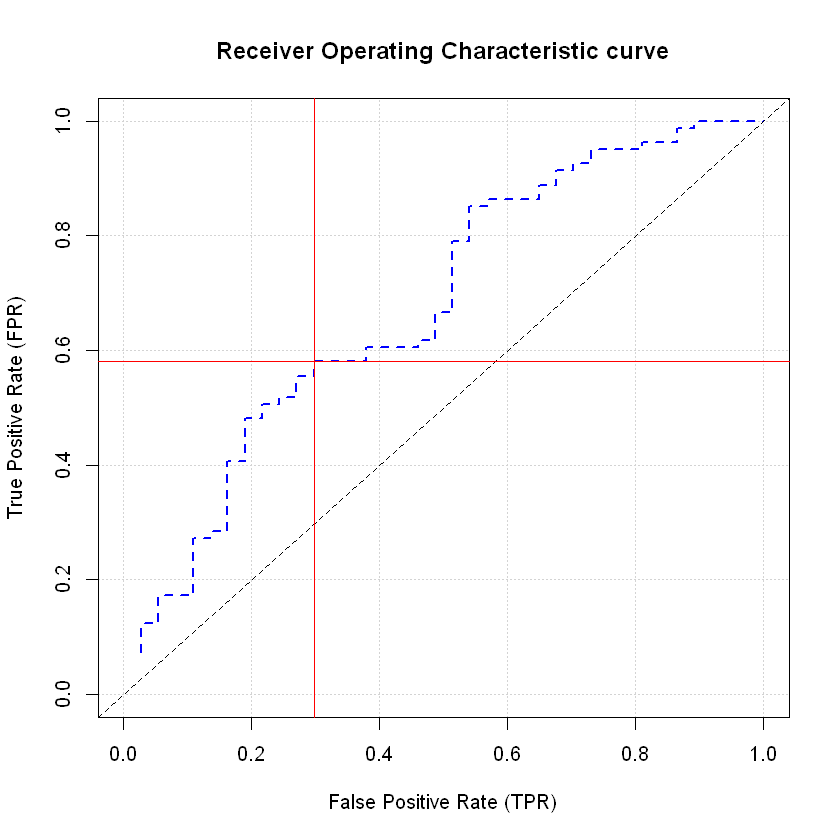

In [47]:
plot(perf, type="roc")
abline(v = v, col = "red")
abline(h = h, col = "red")

In [27]:
predictions <- predict(object = h2o_model@leader, newdata = test_data, type = "prob")

  |======================================================================| 100%


In [79]:
adjusted_preds <- as_tibble(predictions) %>% 
bind_cols(test_y) %>% 
mutate(new_predict = ifelse(test = High_Continuation<thr, yes = "Low_Continuation", no = "High_Continuation"),
       new_predict = as.factor(new_predict))

adjusted_preds %>% 
summarise(accuracy = mean(Continuation_rates==new_predict))

accuracy
<dbl>
0.6949153


In [80]:
caret::confusionMatrix(reference = adjusted_preds$Continuation_rates, 
                       data = adjusted_preds$new_predict)

Confusion Matrix and Statistics

                   Reference
Prediction          High_Continuation Low_Continuation
  High_Continuation                18               17
  Low_Continuation                 19               64
                                           
               Accuracy : 0.6949           
                 95% CI : (0.6034, 0.7763) 
    No Information Rate : 0.6864           
    P-Value [Acc > NIR] : 0.4654           
                                           
                  Kappa : 0.2807           
                                           
 Mcnemar's Test P-Value : 0.8676           
                                           
            Sensitivity : 0.4865           
            Specificity : 0.7901           
         Pos Pred Value : 0.5143           
         Neg Pred Value : 0.7711           
             Prevalence : 0.3136           
         Detection Rate : 0.1525           
   Detection Prevalence : 0.2966           
      Balanced Accuracy :

In [82]:
#Accuracy for the low continuation category (specificity)
64/(64+17)

[1] 0.7901235

In [114]:
#High continuation accuracy (sensitivity)
18/(18+19)

[1] 0.4864865

In [117]:
h2o.auc(object = perf)

[1] 0.678345

# Operating point in a pr curve

PR curves are suitable for imbalanced classes or where the minority class is important. According to wikipedia, sensitivity, recall, and tpr are the same thing. The labels of this chart are interchanged (i.e. tpr is recall) but the formula generating them is correct. In a PR Curve, the goal is to be on the top right corner.

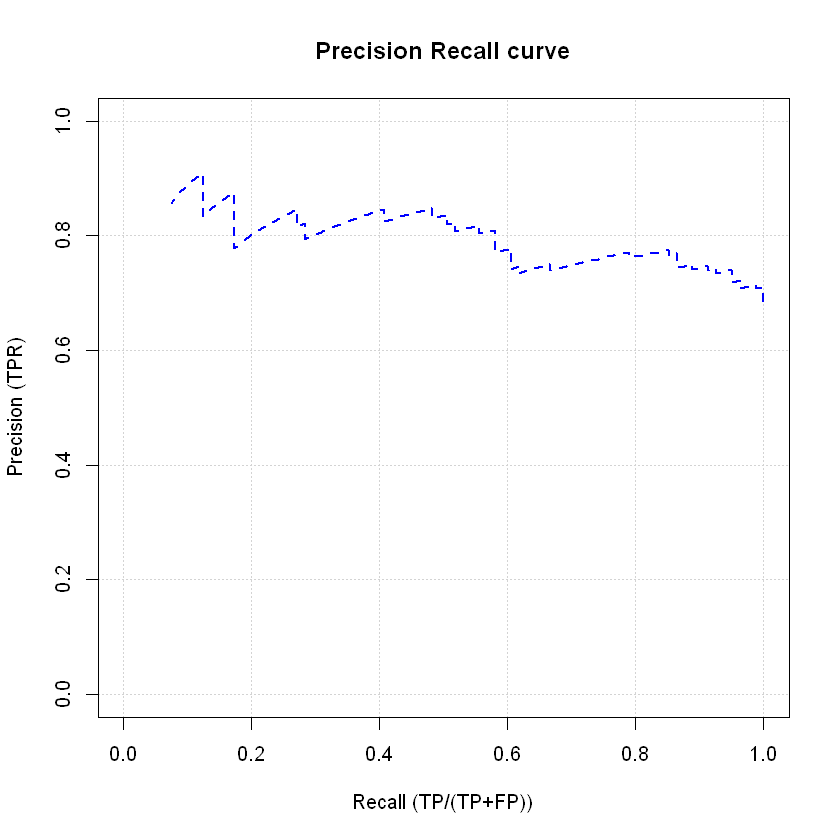

In [31]:
#PRC OPERATING POINT
plot(perf, type="pr")

In [49]:
ls()

[1] "adjusted_preds"   "data"             "distances"        "h"               
 [5] "h2o_model"        "localH2O"         "metrics"          "outcome"         
 [9] "perf"             "predictions"      "predictors"       "prostate.ctrs"   
[13] "prostate.data"    "prostate.hex"     "prostate.km"      "test_data"       
[17] "test_x"           "test_y"           "train_data"       "train_idx"       
[21] "train_x"          "train_y"          "training_results" "v"

## Distances in a graph

The distance from a point $(x1,y1)$ in a curve to a second point $(x2,y2)$ in a graph is given by the formula: <br><br>
`d = sqrt((x2 - x1)^2 + (y2 - y1)^2)`

Ref: 
1. https://youtu.be/_TlaihVGmVU
2. https://youtu.be/pW8JU76Oj84

In [60]:
pr_distances <- bind_cols(as_tibble(h2o.precision(object = perf)),
as_tibble(h2o.recall(object = perf))) %>% 
select(thr = threshold...1, precision, tpr) %>% 
mutate(d = sqrt((1-tpr)^2+(1-precision)^2)) %>% 
arrange(d)

head(pr_distances)

New names:
* threshold -> threshold...1
* threshold -> threshold...3



thr,precision,tpr,d
<dbl>,<dbl>,<dbl>,<dbl>
0.003042203,0.7403846,0.9506173,0.2642703
0.004268013,0.7474747,0.9135802,0.2669033
0.030815655,0.7692308,0.8641975,0.2677625
0.003720736,0.7425743,0.9259259,0.2678712
0.032620300,0.7752809,0.8518519,0.2691590
0.003349901,0.7378641,0.9382716,0.2693058


In [88]:
y <- pr_distances$precision[1]
x <- pr_distances$tpr[1]
pr_thr <- pr_distances$thr[1]

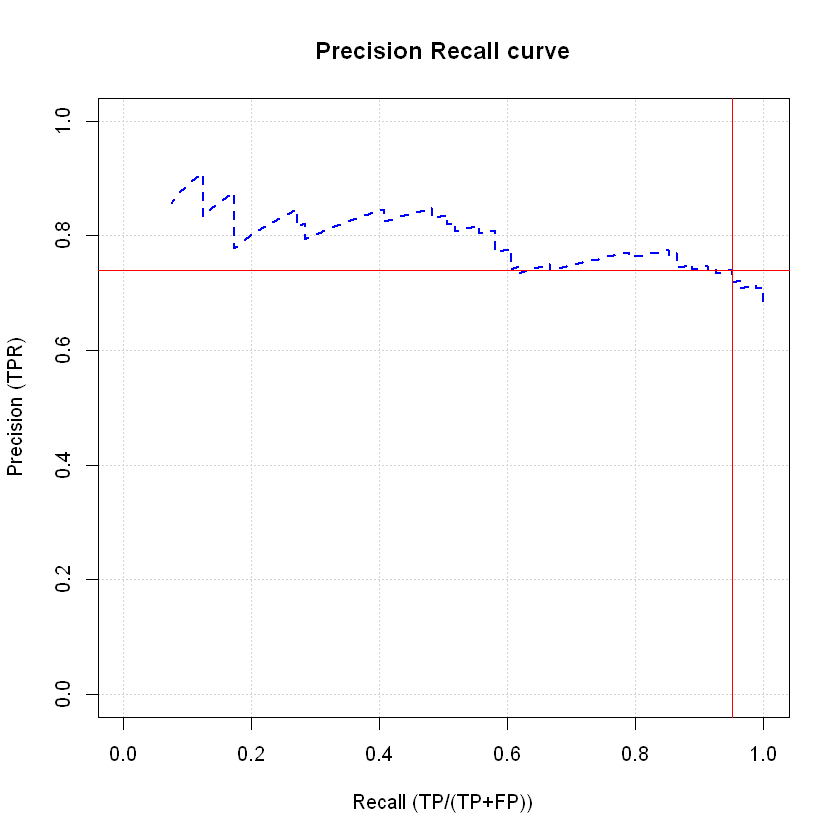

In [64]:
plot(perf, type="pr")
abline(v = x, col="red")
abline(h = y, col="red")

In [85]:
pr_predictions <- predict(object = h2o_model@leader, newdata = test_data, type = "probs")

  |======================================================================| 100%


In [91]:
head(pr_predictions)

,predict,High_Continuation,Low_Continuation
,<fct>,<dbl>,<dbl>
1,Low_Continuation,2.491374e-17,1.000000000
2,High_Continuation,9.976767e-01,0.002323325
3,Low_Continuation,5.683376e-03,0.994316624
4,Low_Continuation,6.430425e-01,0.356957509
5,Low_Continuation,6.591454e-03,0.993408546
6,Low_Continuation,1.478222e-07,0.999999852


In [108]:
pr_adj_preds <- pr_predictions %>% 
as_tibble() %>% 
mutate(adj_pred = ifelse(test = Low_Continuation<pr_thr, yes = "High_Continuation", no = "Low_Continuation"),
       adj_pred = as.factor(adj_pred)) %>% 
bind_cols(test_y)

pr_adj_preds %>% 
summarise(accuracy = mean(adj_pred==Continuation_rates))

accuracy
<dbl>
0.7372881


In [110]:
caret::confusionMatrix(data = pr_adj_preds$adj_pred, reference = pr_adj_preds$Continuation_rates)

Confusion Matrix and Statistics

                   Reference
Prediction          High_Continuation Low_Continuation
  High_Continuation                10                4
  Low_Continuation                 27               77
                                           
               Accuracy : 0.7373           
                 95% CI : (0.6483, 0.814)  
    No Information Rate : 0.6864           
    P-Value [Acc > NIR] : 0.1369           
                                           
                  Kappa : 0.2658           
                                           
 Mcnemar's Test P-Value : 7.772e-05        
                                           
            Sensitivity : 0.27027          
            Specificity : 0.95062          
         Pos Pred Value : 0.71429          
         Neg Pred Value : 0.74038          
             Prevalence : 0.31356          
         Detection Rate : 0.08475          
   Detection Prevalence : 0.11864          
      Balanced Accuracy :

In [111]:
#High continuation accuracy (sensitivity)
10/(10+27)

[1] 0.2702703

In [113]:
#Low continuation accuracy (specificity)
77/(77+4)

[1] 0.9506173

In [116]:
h2o.aucpr(object = perf)

[1] 0.7992543

In [48]:
save.image("./h2o_ml.RData")